In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

In [4]:
data = pd.read_csv("Crop production.csv")

In [5]:
data.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1978,14,Chhattisgarh,Durg,612.5,362.2,591.35,48.7,25.6,...,2000.0,0.0,0.0,0.0,4.75,8.67,13.41,0.04,0.43,0.34
1,1,1979,14,Chhattisgarh,Durg,616.8,330.6,535.99,44.6,17.8,...,1000.0,0.0,0.0,0.0,4.76,8.62,13.38,0.06,0.48,0.28
2,1,1980,14,Chhattisgarh,Durg,634.9,515.6,812.10,44.1,33.6,...,1000.0,0.0,0.0,0.0,4.66,9.57,14.24,0.07,0.47,0.21
3,1,1981,14,Chhattisgarh,Durg,630.0,506.9,804.60,41.5,23.6,...,1000.0,0.0,0.0,0.0,4.66,9.55,14.21,0.05,0.51,0.27
4,1,1982,14,Chhattisgarh,Durg,627.9,513.3,817.49,41.1,23.9,...,2000.0,0.0,0.0,0.0,4.70,10.00,14.70,0.08,0.38,0.21


In [6]:
data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,12408,12409,12410,12411,12412,12413,12414,12415,12416,12417
Dist Code,1,1,1,1,1,1,1,1,1,1,...,917,917,917,917,917,917,917,917,917,917
Year,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State Code,14,14,14,14,14,14,14,14,14,14,...,15,15,15,15,15,15,15,15,15,15
State Name,Chhattisgarh,Chhattisgarh,Chhattisgarh,Chhattisgarh,Chhattisgarh,Chhattisgarh,Chhattisgarh,Chhattisgarh,Chhattisgarh,Chhattisgarh,...,Jharkhand,Jharkhand,Jharkhand,Jharkhand,Jharkhand,Jharkhand,Jharkhand,Jharkhand,Jharkhand,Jharkhand
Dist Name,Durg,Durg,Durg,Durg,Durg,Durg,Durg,Durg,Durg,Durg,...,Singhbhum,Singhbhum,Singhbhum,Singhbhum,Singhbhum,Singhbhum,Singhbhum,Singhbhum,Singhbhum,Singhbhum


In [7]:
data.columns

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

###Exploratory data analysis(EDA)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12418 entries, 0 to 12417
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    12418 non-null  int64  
 1   Year                                         12418 non-null  int64  
 2   State Code                                   12418 non-null  int64  
 3   State Name                                   12418 non-null  object 
 4   Dist Name                                    12418 non-null  object 
 5   RICE AREA (1000 ha)                          12418 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  12418 non-null  float64
 7   RICE YIELD (Kg per ha)                       12418 non-null  float64
 8   WHEAT AREA (1000 ha)                         12418 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 12418 non-null  float64
 10

In [9]:
data.describe()

,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
count,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,...,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000,12418.000000
mean,269.672894,1997.498792,9.569496,132.191313,254.679900,1636.636947,83.537413,215.470676,1662.473753,19.220267,...,4652.695937,28.901091,8.380089,137.257039,8.769613,12.309796,20.859287,3.639544,1.401984,21.255651
std,278.169276,11.549141,4.990355,162.684312,355.034484,990.500973,107.138012,385.654786,1129.212843,41.012224,...,3233.719629,77.460859,27.960259,224.585642,14.655707,19.382306,27.629979,8.934788,4.811817,63.302000
min,1.000000,1978.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,78.000000,1987.000000,6.000000,10.805000,11.207500,926.472500,1.990000,2.372500,929.885000,0.000000,...,2058.547500,0.000000,0.000000,0.000000,0.300000,1.800000,2.810000,0.000000,0.060000,0.000000
50%,156.000000,1998.000000,10.000000,72.005000,116.735000,1539.035000,39.500000,52.195000,1562.035000,1.510000,...,4847.735000,0.040000,0.000000,0.000000,2.770000,5.510000,10.650000,0.450000,0.320000,0.920000
75%,241.000000,2008.000000,12.000000,196.400000,359.957500,2297.180000,138.375000,280.387500,2375.835000,16.392500,...,6891.222500,10.000000,2.280000,232.560000,10.310000,14.020000,26.997500,3.980000,1.000000,14.935000
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,334.800000,...,22062.300000,800.890000,376.610000,5000.000000,140.700000,200.060000,240.990000,111.610000,131.350000,1162.660000


###Data cleaning and processing

In [10]:
# As the dist code and dist code is not important in this dataset so we could drop it.
data.drop("Dist Code", axis=1, inplace=True)

In [11]:
# As the state code and dist code is not important in this dataset so we could drop it.
data.drop("State Code", axis=1, inplace=True)

In [12]:
data.head()

,Year,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1978,Chhattisgarh,Durg,612.5,362.2,591.35,48.7,25.6,525.67,0.1,...,2000.0,0.0,0.0,0.0,4.75,8.67,13.41,0.04,0.43,0.34
1,1979,Chhattisgarh,Durg,616.8,330.6,535.99,44.6,17.8,399.10,0.5,...,1000.0,0.0,0.0,0.0,4.76,8.62,13.38,0.06,0.48,0.28
2,1980,Chhattisgarh,Durg,634.9,515.6,812.10,44.1,33.6,761.90,0.2,...,1000.0,0.0,0.0,0.0,4.66,9.57,14.24,0.07,0.47,0.21
3,1981,Chhattisgarh,Durg,630.0,506.9,804.60,41.5,23.6,568.67,0.2,...,1000.0,0.0,0.0,0.0,4.66,9.55,14.21,0.05,0.51,0.27
4,1982,Chhattisgarh,Durg,627.9,513.3,817.49,41.1,23.9,581.51,0.1,...,2000.0,0.0,0.0,0.0,4.70,10.00,14.70,0.08,0.38,0.21


In [13]:
data.drop(data.iloc[:, 6:], axis=1, inplace=True)

In [14]:
data.head()

,Year,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha)
0,1978,Chhattisgarh,Durg,612.5,362.2,591.35
1,1979,Chhattisgarh,Durg,616.8,330.6,535.99
2,1980,Chhattisgarh,Durg,634.9,515.6,812.10
3,1981,Chhattisgarh,Durg,630.0,506.9,804.60
4,1982,Chhattisgarh,Durg,627.9,513.3,817.49


In [15]:
# Find the columns which contain strings
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

State Name
Dist Name


In [17]:
# This will turn all of the string value into category values
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12418 entries, 0 to 12417
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Year                         12418 non-null  int64   
 1   State Name                   12418 non-null  category
 2   Dist Name                    12418 non-null  category
 3   RICE AREA (1000 ha)          12418 non-null  float64 
 4   RICE PRODUCTION (1000 tons)  12418 non-null  float64 
 5   RICE YIELD (Kg per ha)       12418 non-null  float64 
dtypes: category(2), float64(3), int64(1)
memory usage: 435.8 KB


In [19]:
data["State Name"].cat.categories

Index(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Orissa', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'],
      dtype='object')

In [20]:
data["State Name"].cat.codes

0        3
1        3
2        3
3        3
4        3
        ..
12413    7
12414    7
12415    7
12416    7
12417    7
Length: 12418, dtype: int8

In [21]:
data.isna().sum()

Year                           0
State Name                     0
Dist Name                      0
RICE AREA (1000 ha)            0
RICE PRODUCTION (1000 tons)    0
RICE YIELD (Kg per ha)         0
dtype: int64

In [22]:
data.head()

,Year,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha)
0,1978,Chhattisgarh,Durg,612.5,362.2,591.35
1,1979,Chhattisgarh,Durg,616.8,330.6,535.99
2,1980,Chhattisgarh,Durg,634.9,515.6,812.10
3,1981,Chhattisgarh,Durg,630.0,506.9,804.60
4,1982,Chhattisgarh,Durg,627.9,513.3,817.49


In [23]:
data["State Name"].dtype

CategoricalDtype(categories=['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
                  'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand',
                  'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
                  'Orissa', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
                  'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
, ordered=True)

In [24]:
# Check for columns which aren't numeric
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

State Name
Dist Name


In [25]:
# Turn categorical variables into numbers and fill missing
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        data[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        data[label] = pd.Categorical(content).codes+1

In [26]:
pd.Categorical(data["State Name"]).codes+1

array([4, 4, 4, ..., 8, 8, 8], dtype=int8)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12418 entries, 0 to 12417
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         12418 non-null  int64  
 1   State Name                   12418 non-null  int8   
 2   Dist Name                    12418 non-null  int16  
 3   RICE AREA (1000 ha)          12418 non-null  float64
 4   RICE PRODUCTION (1000 tons)  12418 non-null  float64
 5   RICE YIELD (Kg per ha)       12418 non-null  float64
 6   State Name_is_missing        12418 non-null  bool   
 7   Dist Name_is_missing         12418 non-null  bool   
dtypes: bool(2), float64(3), int16(1), int64(1), int8(1)
memory usage: 448.8 KB


In [28]:

data.head()

,Year,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),State Name_is_missing,Dist Name_is_missing
0,1978,4,93,612.5,362.2,591.35,False,False
1,1979,4,93,616.8,330.6,535.99,False,False
2,1980,4,93,634.9,515.6,812.10,False,False
3,1981,4,93,630.0,506.9,804.60,False,False
4,1982,4,93,627.9,513.3,817.49,False,False


###Data analysis using matplotlib and seaborn

C:\Users\HP\AppData\Local\Temp\ipykernel_7312\1486666285.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data["State Name"], rotation=45)


FileNotFoundError: [Errno 2] No such file or directory: 'Documents/Git/ML-Crate/Crop Production Prediction/Images/statename vs Rice production.png'

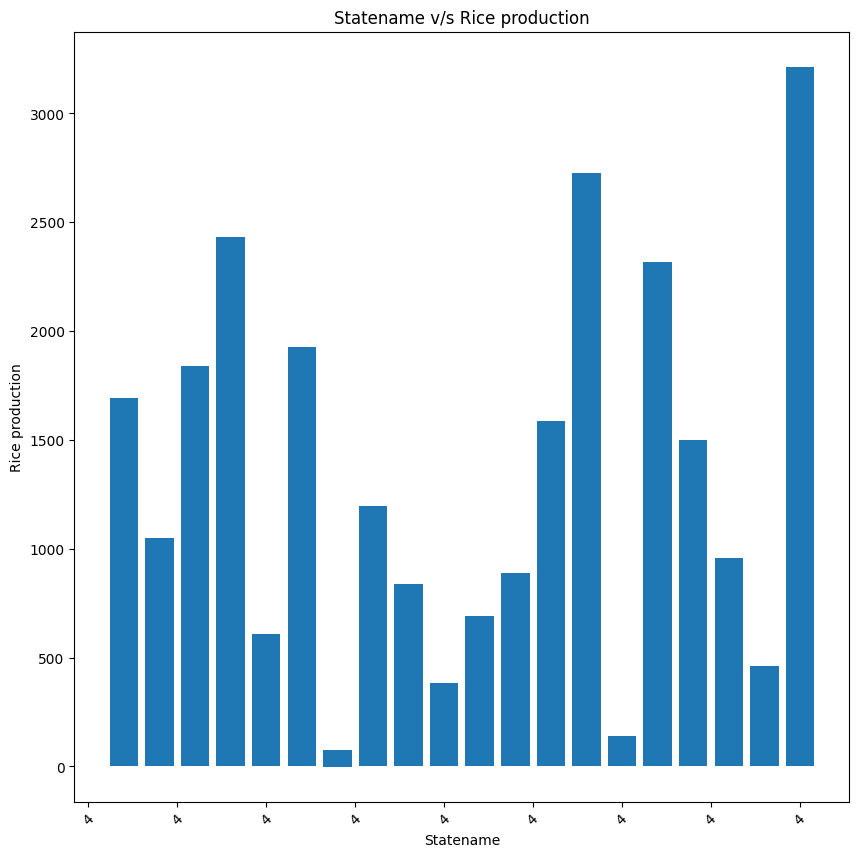

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Statename v/s Rice production",
       xlabel="Statename",
       ylabel="Rice production")
ax.bar(data["State Name"], data["RICE PRODUCTION (1000 tons)"]);
ax.set_xticklabels(data["State Name"], rotation=45)
fig.savefig("Documents/Git/ML-Crate/Crop Production Prediction/Images/statename vs Rice production")

C:\Users\HP\AppData\Local\Temp\ipykernel_7312\1805936907.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data["Year"], rotation=45);


FileNotFoundError: [Errno 2] No such file or directory: 'Documents/Git/ML-Crate/Crop Production Prediction/Images/year vs Rice production.png'

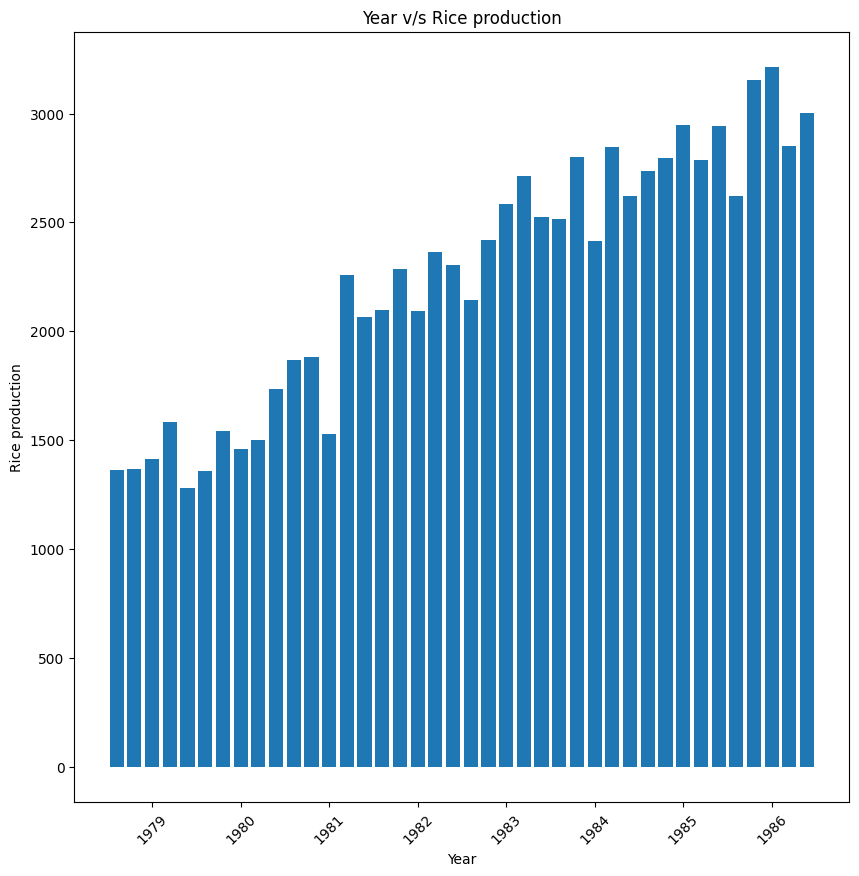

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Year v/s Rice production",
       xlabel="Year",
       ylabel="Rice production");
ax.bar(data["Year"], data["RICE PRODUCTION (1000 tons)"]);
ax.set_xticklabels(data["Year"], rotation=45);
fig.savefig("Documents/Git/ML-Crate/Crop Production Prediction/Images/year vs Rice production");

C:\Users\HP\AppData\Local\Temp\ipykernel_7312\3690149226.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data["RICE AREA (1000 ha)"], rotation=45);


FileNotFoundError: [Errno 2] No such file or directory: 'Documents/Git/ML-Crate/Crop Production Prediction/Images/Rice Area vs Rice production.png'

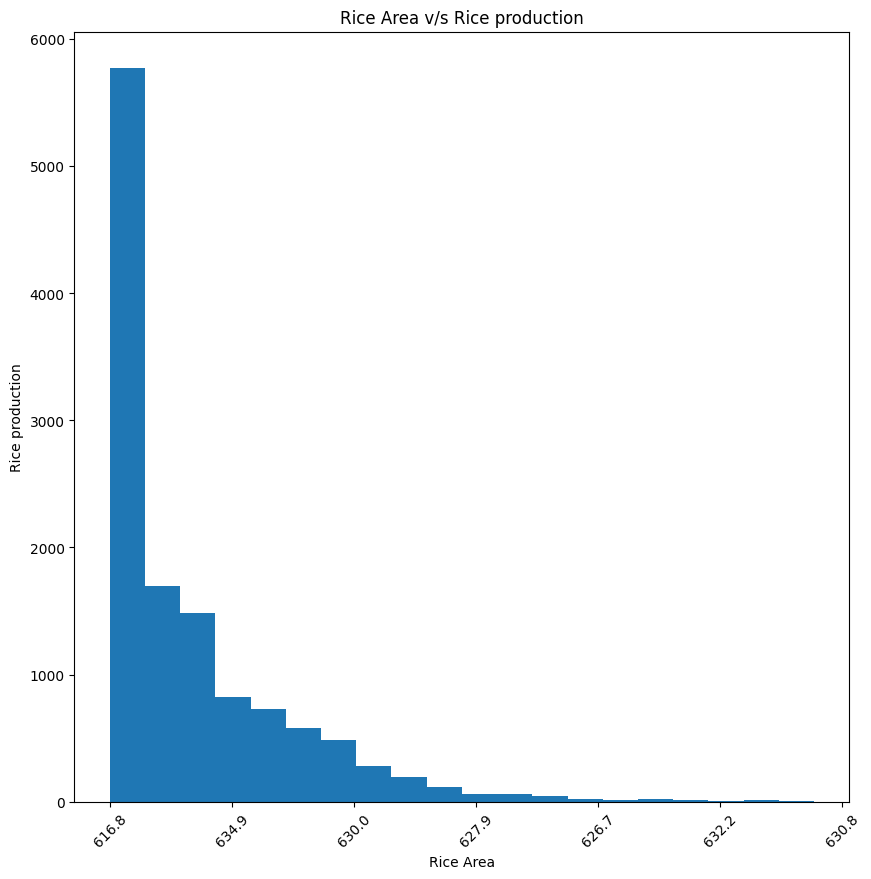

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Rice Area v/s Rice production",
       xlabel="Rice Area",
       ylabel="Rice production");
ax.hist(data["RICE AREA (1000 ha)"], bins=20);
ax.set_xticklabels(data["RICE AREA (1000 ha)"], rotation=45);
fig.savefig("Documents/Git/ML-Crate/Crop Production Prediction/Images/Rice Area vs Rice production");

FileNotFoundError: [Errno 2] No such file or directory: 'Documents/Git/ML-Crate/Crop Production Prediction/Images/Rice Area vs Rice production.png'

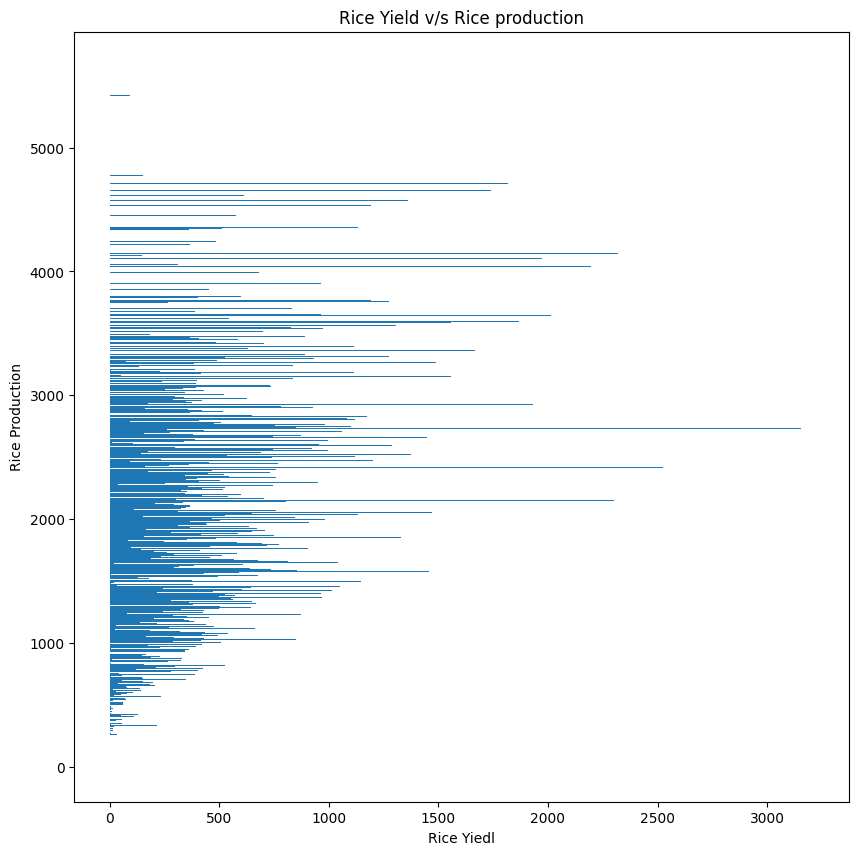

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Rice Yield v/s Rice production",
       xlabel="Rice Yiedl",
       ylabel="Rice Production");
ax.barh(list(data["RICE YIELD (Kg per ha)"]), list(data["RICE PRODUCTION (1000 tons)"]));
fig.savefig("Documents/Git/ML-Crate/Crop Production Prediction/Images/Rice Area vs Rice production");

FileNotFoundError: [Errno 2] No such file or directory: 'Documents/Git/ML-Crate/Crop Production Prediction/Images/Rice Area vs Rice production 2.png'

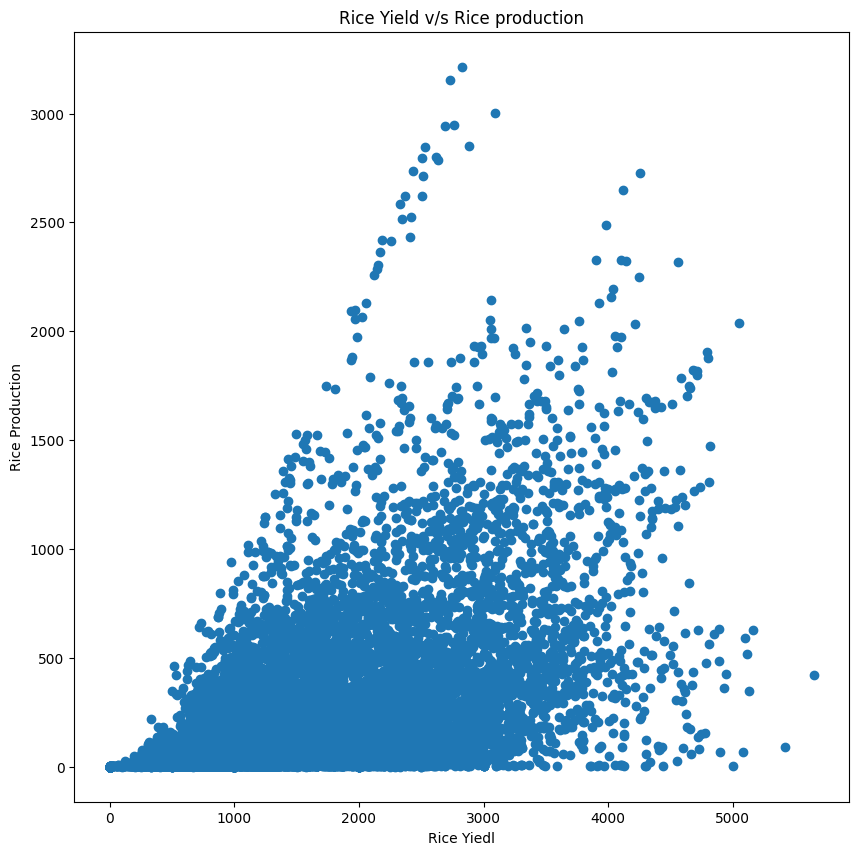

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Rice Yield v/s Rice production",
       xlabel="Rice Yiedl",
       ylabel="Rice Production");
ax.scatter(data["RICE YIELD (Kg per ha)"], data["RICE PRODUCTION (1000 tons)"]);
fig.savefig("Documents/Git/ML-Crate/Crop Production Prediction/Images/Rice Area vs Rice production 2");

###Image processing

In [34]:
X = data.drop("RICE YIELD (Kg per ha)", axis=1)
y = data["RICE YIELD (Kg per ha)"]

In [35]:
X.shape, y.shape

((12418, 7), (12418,))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9934, 7), (9934,), (2484, 7), (2484,))

In [38]:
# Creating a function for the metrics
def metrics(y_true, y_preds):
    score = {"Mean Absolute Error": mean_absolute_error(y_true, y_preds),
             "Mean Squared Error" : mean_squared_error(y_true, y_preds),
             "Root Mean Squared Error": np.sqrt(mean_squared_error(y_true, y_preds)),
             "R2 Score" : r2_score(y_true, y_preds)}
    return score

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12418 entries, 0 to 12417
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         12418 non-null  int64  
 1   State Name                   12418 non-null  int8   
 2   Dist Name                    12418 non-null  int16  
 3   RICE AREA (1000 ha)          12418 non-null  float64
 4   RICE PRODUCTION (1000 tons)  12418 non-null  float64
 5   RICE YIELD (Kg per ha)       12418 non-null  float64
 6   State Name_is_missing        12418 non-null  bool   
 7   Dist Name_is_missing         12418 non-null  bool   
dtypes: bool(2), float64(3), int16(1), int64(1), int8(1)
memory usage: 448.8 KB


In [40]:
X_train.head()

,Year,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),State Name_is_missing,Dist Name_is_missing
5805,1987,15,58,19.00,28.00,False,False
2464,2002,17,153,182.00,498.00,False,False
8443,1985,18,23,107.10,114.40,False,False
2912,2010,9,36,130.68,462.98,False,False
3270,2008,9,162,35.36,84.78,False,False


In [41]:
# Random Forest Model
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_preds = forest.predict(X_test)
metrics(y_test, y_preds)

{'Mean Absolute Error': 54.001375684380044,
 'Mean Squared Error': 15054.029160373284,
 'Root Mean Squared Error': 122.6948619966349,
 'R2 Score': 0.9851250170602994}

In [42]:
# Random Forest Model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_preds = tree.predict(X_test)
metrics(y_test, y_preds)

{'Mean Absolute Error': 82.74424315619969,
 'Mean Squared Error': 31794.36349557165,
 'Root Mean Squared Error': 178.30974032725092,
 'R2 Score': 0.9685837851423732}

In [43]:
# Random Forest Model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)
metrics(y_test, y_preds)

{'Mean Absolute Error': 72.13135511573914,
 'Mean Squared Error': 13939.589943851634,
 'Root Mean Squared Error': 118.06604060377241,
 'R2 Score': 0.9862262016107273}

In [44]:
# Random Forest Model
svr = SVR()
svr.fit(X_train, y_train)
y_preds = svr.predict(X_test)
metrics(y_test, y_preds)

{'Mean Absolute Error': 756.5363091189079,
 'Mean Squared Error': 867224.2281497619,
 'Root Mean Squared Error': 931.2487466567469,
 'R2 Score': 0.14309016800769758}

In [45]:
rd = Ridge()
rd.fit(X_train, y_train)
y_preds = rd.predict(X_test)
metrics(y_test, y_preds)

{'Mean Absolute Error': 565.7309990405315,
 'Mean Squared Error': 560443.4544300131,
 'Root Mean Squared Error': 748.6277141744173,
 'R2 Score': 0.4462222216722095}

In [46]:
ltb = LGBMRegressor()
ltb.fit(X_train, y_train)
y_preds = ltb.predict(X_test)
metrics(y_test, y_preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 9934, number of used features: 5
[LightGBM] [Info] Start training from score 1636.499864


{'Mean Absolute Error': 72.85248978707666,
 'Mean Squared Error': 14305.105190197537,
 'Root Mean Squared Error': 119.60395139876248,
 'R2 Score': 0.9858650336472755}

Mean Squared Error (MSE): 560447.1074461406
Mean Absolute Error (MAE): 565.7346368901283
R-squared (R2): 0.4462186121035022


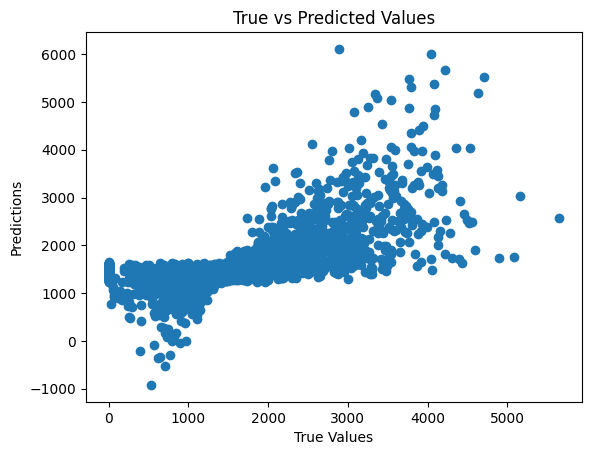

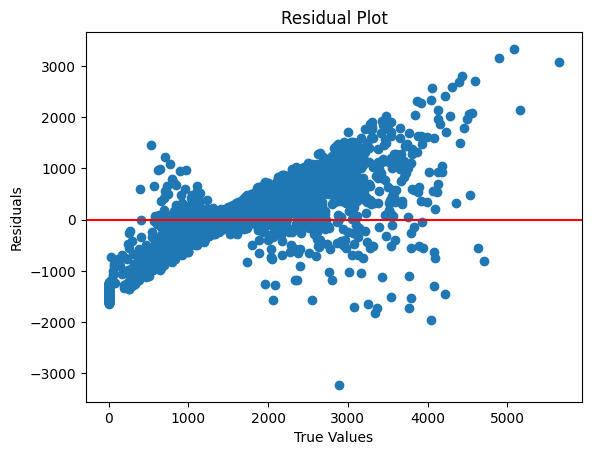

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Train the Lasso regression model
lasso = Lasso()
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_preds = lasso.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Visualize the model's performance
plt.scatter(y_test, y_preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

# Plot residuals
residuals = y_test - y_preds
plt.scatter(y_test, residuals)
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
